In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import warnings
warnings.filterwarnings('ignore')

In [19]:
data=pd.read_csv(r"C:\Desktop1\Shwetha V\Research Paper\Google_train_data.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [21]:
data["Close"]=pd.to_numeric(data.Close,errors=('coerce'))
data=data.dropna()
trainData = data.iloc[:,4:5].values

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [23]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [24]:
X_train=[]
y_train=[]

for i in range (60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [25]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [26]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [27]:
hist = model.fit(X_train, y_train, epochs=20, batch_size = 32,verbose = 2)

Epoch 1/20
35/35 - 18s - loss: 0.0431 - 18s/epoch - 505ms/step
Epoch 2/20
35/35 - 7s - loss: 0.0118 - 7s/epoch - 200ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0096 - 7s/epoch - 203ms/step
Epoch 4/20
35/35 - 7s - loss: 0.0090 - 7s/epoch - 198ms/step
Epoch 5/20
35/35 - 7s - loss: 0.0073 - 7s/epoch - 204ms/step
Epoch 6/20
35/35 - 7s - loss: 0.0079 - 7s/epoch - 200ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0079 - 7s/epoch - 200ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0083 - 7s/epoch - 200ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 201ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0068 - 7s/epoch - 205ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0060 - 7s/epoch - 204ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 202ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0053 - 7s/epoch - 198ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0067 - 7s/epoch - 201ms/step
Epoch 15/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 199ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0050 - 7s/epoch - 199ms/step
Epoch 17/20
35/

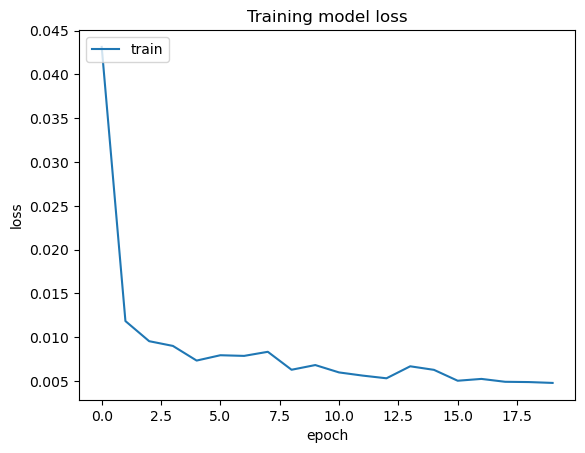

In [33]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [34]:
testData = pd.read_csv(r'C:\Desktop1\Shwetha V\Research Paper\Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape


(192, 60, 1)

In [35]:
y_pred=model.predict(X_test)
y_pred

6/6 [==============================] - 0s 81ms/step


array([[1.2428862],
       [1.245752 ],
       [1.2561913],
       [1.2725602],
       [1.2875123],
       [1.2914855],
       [1.2829846],
       [1.267635 ],
       [1.2553282],
       [1.2496673],
       [1.2422533],
       [1.2314148],
       [1.221029 ],
       [1.2111908],
       [1.2073001],
       [1.2097249],
       [1.2245523],
       [1.250277 ],
       [1.2818642],
       [1.3149885],
       [1.3334035],
       [1.3363918],
       [1.3220137],
       [1.2962843],
       [1.2695118],
       [1.2506546],
       [1.2421093],
       [1.2384475],
       [1.2311575],
       [1.2209079],
       [1.2092414],
       [1.195851 ],
       [1.1766375],
       [1.1525452],
       [1.1394106],
       [1.1436373],
       [1.1612694],
       [1.1847306],
       [1.2091933],
       [1.2249693],
       [1.2395889],
       [1.255566 ],
       [1.2733645],
       [1.2904111],
       [1.3031466],
       [1.3074032],
       [1.300917 ],
       [1.2927519],
       [1.2886977],
       [1.2916738],


In [36]:
predicted_price = sc.inverse_transform(y_pred)

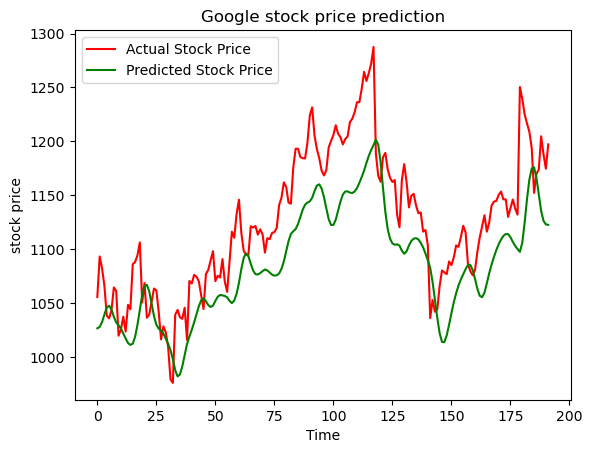

In [37]:
plt.plot(y_test, color='red', label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('stock price')
plt.legend()
plt.show()